# Processing classifications from [READMECLassifier](https://github.com/gprana/READMEClassifier)
we used the readme classifier project to label each readme file section. We followed the instruction stated in the readme file (under Use Case 3: Training Model on Existing Data and Classifying New Files (More Detailed Breakdown)).

The result of the classification is saved under - here we use the repositories' readme files in *data/processed/repositories_with-readme.csv* :
    
  - section code *data/ghtorrent_readme_classifications/ghtorrent_section_codes.csv*
  - *data/ghtorrent_readme_classifications/ghtorrent_file_codes.csv*
    
    
out:

 - csv file of repos containing WhatWhy sections: *data/processed/repositories_with-readme_what-why-code.csv*
 - statistics about headlines in readme files: *data/readme_files_stats/{}.csv*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
readme_section_classifications_path = '../../data/ghtorrent_readme_classifications/ghtorrent_section_codes.csv'
readme_file_classifications_path = '../../data/ghtorrent_readme_classifications/ghtorrent_file_codes.csv'
dataset_path = '../../data/processed/repositories_with-readme.csv'
out_data = '../../data/readme_files_stats/{}.csv'

mapping = {1: 'WhatWhy', 3: 'How', 4:'When', 5:'Who', 6:'References',7:'Contribution',8:'Other'}
codes = list(mapping.values())


### Load dataset from *data/processed/repositories_with-readme.csv*

In [6]:
dataset_df = pd.read_csv(dataset_path)

### Load readme classsification

In [7]:
readme_section_classifications_df = pd.read_csv(readme_section_classifications_path, encoding='utf-8')

In [10]:
headings_counts_df = get_headings_counts(readme_section_classifications_df, 'headings_value_counts')
headings_counts_df.head()

,heading_markdown
##,4066
## Installation,3454
## Usage,2546
## License,2228
#,1485


### Extract section codes 

In [11]:
def extract_section_codes(row):
    mapping = {1: 'WhatWhy', 3: 'How', 4:'When', 5:'Who', 6:'References',7:'Contribution',8:'Other'}
    codes = str(row['section_code']).strip()

    for c in codes.split(','):

        if c.isdigit() and c != 'nan':
            row[mapping[int(c)]] = 1
    return row

In [12]:
readme_section_classifications_df = readme_section_classifications_df.apply(extract_section_codes, axis=1)


### Get only WhatWhy codes

In [13]:
readme_whatwhy_df = readme_section_classifications_df[ readme_section_classifications_df['WhatWhy'] == 1]



In [16]:
whatwhy_headings_counts_df = get_headings_counts(readme_whatwhy_df, 'headings_whatwhy_value_counts')
whatwhy_headings_counts_df.head()

,heading_markdown
## Features,946
## Introduction,457
## Overview,434
# Features,245
## About,216


### general overview of readme codes

In [17]:
def get_general_stats(df, desc):
    
    print()
    print(desc)
    print()
    print('unique headings: ', len(df['heading_markdown'].unique()), 
          ' with total of ', len(df), ' headings.')
    
    print('found headings in ', len(df['local_readme_file'].unique()), 
          ' readme files out of ', len(dataset_df), '.')
    
def get_headings_counts(df, filename=None):  
    heading_md_vc = df['heading_markdown'].value_counts().to_frame()
    if filename is not None:
        heading_md_vc.reset_index().to_csv(out_data.format(filename))
    return heading_md_vc
    
def get_dstr(df):
    codes_num = []
    files_num = []
    print('total number of sections in ', len(df['file_id'].unique()), ' repositories: ', len(df))
    for code in codes:
        code_df = df[ df[code] == 1]
        codes_num.append(len(code_df))
        files_num.append((len(code_df['file_id'].unique())))
        print(code, ': ', len(code_df), 'in ', len(code_df['file_id'].unique()), 'files')
    return codes_num, files_num
    

def plot_bar_x(label, vals, title):
    # this is for plotting purpose
    index = np.arange(len(label))
    plt.bar(index, vals)
    plt.xlabel('Code', fontsize=14)
    plt.ylabel('Occurrence', fontsize=14)
    plt.xticks(index, label, fontsize=14, rotation=30)
    plt.title(title)
    plt.show()

In [18]:
get_general_stats(readme_section_classifications_df, 'ALL')
get_general_stats(readme_whatwhy_df, 'WHATWHY')




ALL

unique headings:  100855  with total of  169521  headings.
found headings in  19797  readme files out of  20590 .

WHATWHY

unique headings:  21701  with total of  28932  headings.
found headings in  14065  readme files out of  20590 .


DISTRIBUTION OF ALL SECTIONS IN README
++++++++++++++++++++++++++++++++++++++
total number of sections in  19797  repositories:  169521
WhatWhy :  28932 in  14065 files
How :  88662 in  16968 files
When :  8929 in  4980 files
Who :  9894 in  7127 files
References :  27206 in  12365 files
Contribution :  3067 in  2803 files
Other :  901 in  729 files


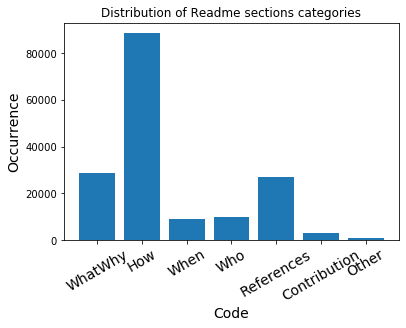

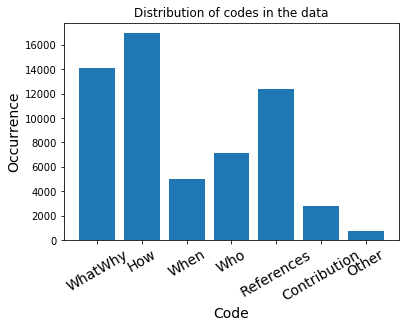

In [19]:
print('DISTRIBUTION OF ALL SECTIONS IN README')
print('++++++++++++++++++++++++++++++++++++++')
codes_num, files_num = get_dstr(readme_section_classifications_df)

plot_bar_x(codes, codes_num, 'Distribution of Readme sections categories')
plot_bar_x(codes, files_num, 'Distribution of codes in the data')

DISTRIBUTION OF ALL WHATWHY IN README
++++++++++++++++++++++++++++++++++++++
total number of sections in  14065  repositories:  28932
WhatWhy :  28932 in  14065 files
How :  6044 in  4488 files
When :  663 in  602 files
Who :  612 in  576 files
References :  5758 in  4457 files
Contribution :  32 in  32 files
Other :  59 in  52 files


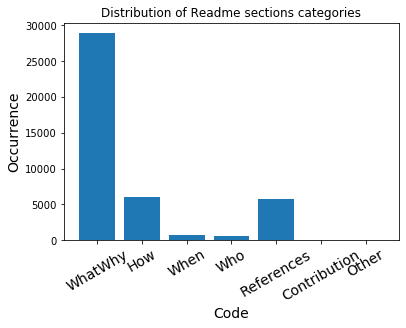

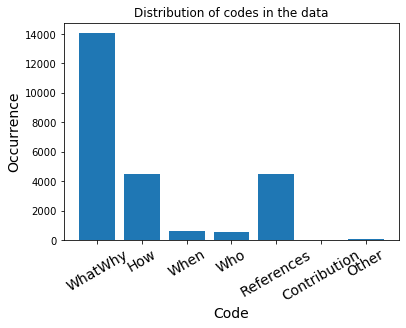

In [20]:
print('DISTRIBUTION OF ALL WHATWHY IN README')
print('++++++++++++++++++++++++++++++++++++++')
codes_num, files_num = get_dstr(readme_whatwhy_df)

plot_bar_x(codes, codes_num, 'Distribution of Readme sections categories')
plot_bar_x(codes, files_num, 'Distribution of codes in the data')

In [21]:
# readme_whatwhy_df[codes].sum().plot(kind='bar', title='Other *codes* for sections classified as What/Why', rot=45)
# readme_section_classifications_df[codes].sum().plot(kind='bar', title='codes for sections ', rot=45)

In [22]:
##
readme_whatwhy_df.head()

,Contribution,How,Other,References,WhatWhy,When,Who,file_id,heading_markdown,local_readme_file,section_code,section_id
4,NaN,NaN,NaN,NaN,1.0,NaN,NaN,3,# Imports in Python,00111000.Imports-in-Python.md,1,1
9,NaN,NaN,NaN,NaN,1.0,NaN,NaN,3,### Relative vs. Absolute Imports,00111000.Imports-in-Python.md,"-,1",6
33,NaN,NaN,NaN,1.0,1.0,NaN,NaN,5,# Pipetools,0101.pipetools.md,"1,6",1
34,NaN,NaN,NaN,NaN,1.0,NaN,NaN,5,## Why?,0101.pipetools.md,1,2
43,NaN,NaN,NaN,NaN,1.0,NaN,NaN,7,#### Functionality Description,01org.CeTune.md,1,1


In [23]:
dataset_df.head()

,id,created_at,description,language,name,owner_id,readme_file_name,readme_name,readme_words_num,updated_at,url,watchers,repo_labels,all_languages,members_ids,members_number,topics
0,58952,2011-01-08 14:28:13,Small and simple gravatar usage in Flask.,Python,Flask-Gravatar,144927,zzzsochi.Flask-Gravatar,NaN,300.0,2019-03-09 15:56:32,https://api.github.com/repos/zzzsochi/Flask-Gr...,75,NaN,"python, shell",621452,1,NaN
1,3844721,2013-05-25 20:05:42,Mirror of SQLAlchemy,Python,sqlalchemy,300186,zzzeek.sqlalchemy,NaN,770.0,2019-05-31 04:25:42,https://api.github.com/repos/zzzeek/sqlalchemy,3285,NaN,"c, python","4659549, 4680519, 47663343",3,NaN
2,3782043,2013-05-22 00:54:51,Mirror of Mako Templates for Python,Python,mako,300186,zzzeek.mako,NaN,257.0,2019-05-31 10:52:06,https://api.github.com/repos/zzzeek/mako,174,NaN,"html, mako, python","4680519, 47663343",2,NaN
3,3834946,2013-05-22 21:37:41,Github mirror of Alembic,Python,alembic,300186,zzzeek.alembic,NaN,799.0,2019-05-31 13:37:38,https://api.github.com/repos/zzzeek/alembic,431,NaN,"mako, python","4680519, 47663343",2,NaN
4,17809005,2015-03-22 15:00:23,Implements of community detection algorithms,Python,CommunityDetection,7483319,zzz24512653.CommunityDetection,NaN,117.0,2019-05-29 02:43:39,https://api.github.com/repos/zzz24512653/Commu...,159,NaN,"css, java, python, scala, xslt",NaN,0,NaN


In [24]:
readme_file_names_whatwhy = list(readme_whatwhy_df['local_readme_file'].values)
def set_repo_has_whatwhy(row, readme_names_lst):
    md_name = row['readme_file_name'] + '.md'
    row['has_whatwhy'] = False
    if md_name in readme_names_lst:
        row['has_whatwhy'] = True
    return row

In [25]:
dataset_onlywhatwhy_df = dataset_df.apply(set_repo_has_whatwhy, args=(readme_file_names_whatwhy,), axis=1)

In [26]:
len(dataset_onlywhatwhy_df[dataset_onlywhatwhy_df['has_whatwhy'] == True])

14065

In [27]:
dataset_onlywhatwhy_df = dataset_onlywhatwhy_df[dataset_onlywhatwhy_df['has_whatwhy'] == True]

In [28]:
# save
#dataset_onlywhatwhy_df.reset_index().to_csv('../../data/processed/repositories_with-readme_what-why-code.csv', encoding="utf-8", index=False)